# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

*Признаки*

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

*Целевой признак*

- Exited — факт ухода клиента


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn. preprocessing import OneHotEncoder

In [2]:
churn = pd.read_csv('/datasets/Churn.csv')

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Выполним некоторые преобразования:
- удалим столбцы **RowNumber**(повторяет номер строки датафрейма), **CustomerId** (идентификационный номер клиента, можно удалить, на обучение не влияет), **Surname** (фамилия также никакой ценности не несет); 
- для столбцов **Geography**, **Gender** выполнить преобразование OHE (после преобразования столбцы следует удалить). 

In [4]:
churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


**OHE** для столбцов **Gender**, **Geography**

In [7]:
gender_ohe = pd.get_dummies(churn['Gender'], drop_first=True)
geography_ohe = pd.get_dummies(churn['Geography'], drop_first=True)
churn = churn.drop(['Gender', 'Geography'], axis=1)
churn = pd.concat([churn, gender_ohe, geography_ohe], axis=1)

In [8]:
churn.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1
5,645,44,8.0,113755.78,2,1,0,149756.71,1,1,0,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,1,0,0
7,376,29,4.0,115046.74,4,1,0,119346.88,1,0,1,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,1,0,0
9,684,27,2.0,134603.88,1,1,1,71725.73,0,1,0,0


**Отрицательные и положительные объекты столбца Exited**

In [9]:
positive = sum(churn['Exited'])/len(churn)
print(positive)

0.2037


In [10]:
negative = 1 - positive
print(negative)

0.7963


- **Положительных обьектов:** 20%;
- **Отрицательных объектов:** 80%.
    

In [11]:
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


In [12]:
churn.isna().sum()

CreditScore          0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Male                 0
Germany              0
Spain                0
dtype: int64

In [14]:
churn.dropna(subset=['Tenure'], inplace=True)

In [15]:
churn.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Male               0
Germany            0
Spain              0
dtype: int64

In [16]:
features = churn.drop('Exited', axis = 1)
target = churn['Exited']

Разобъем данные на обучающую, валидационную и тестовую выборки в отношении **60 : 20 : 20**

In [17]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.4, random_state=12345)

In [18]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test,target_valid_test, test_size = 0.5, random_state=12345)

In [19]:
print('Исходная выборка:','размер features -', features.shape,',', 'размер target -', target.shape)
print('Обучающая выборка:','размер features-', features_train.shape,',', 'размер target -', target_train.shape)
print('Валидационная выборка:', 'размер features-', features_valid.shape,',', 'размер target-', target_valid.shape)
print('Тестовая выборка:','размер features-', features_test.shape,',', 'размер target-', target_test.shape)


Исходная выборка: размер features - (9091, 11) , размер target - (9091,)
Обучающая выборка: размер features- (5454, 11) , размер target - (5454,)
Валидационная выборка: размер features- (1818, 11) , размер target- (1818,)
Тестовая выборка: размер features- (1819, 11) , размер target- (1819,)


**Масштабирование призаков**

Выполним масштабирование в всех трех выборках.
Масштабированию подлежат следующие признаки:
- CreditScore;
- Tenure;
- Age;
- Balance;
- EstimatedSalary.


In [20]:
numeric = ['CreditScore','Tenure','Age','Balance','EstimatedSalary' ]

In [21]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
print(features_train.shape) 
print(features_valid.shape) 
print(features_test.shape) 

(5454, 11)
(1818, 11)
(1819, 11)


## Исследование задачи

Рассмотрим три модели:
   - Решающее дерево;
   - Случайный лес;
   - Линейная регрессия.

**Решающее дерево**

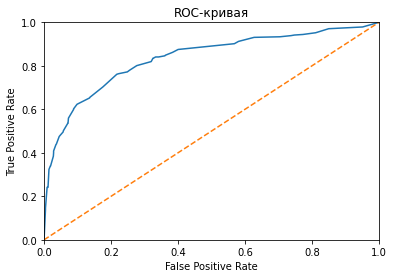

Глубина: 7
F1-мера, 0.5773524720893142
AUC-ROC: 0.8352437244250879


In [22]:
best_depth_dtc = best_f1_dtc = 0

for depth in range(1, 25):
    model_dtc = DecisionTreeClassifier(max_depth = depth, random_state=12345)
    model_dtc.fit(features_train, target_train)
    predicted_valid_dtc = model_dtc.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_valid_dtc)
    if f1_dtc >= best_f1_dtc:
        best_f1_dtc = f1_dtc
        best_model_dtc = model_dtc
        best_depth_dtc = depth      

probabilities_valid = best_model_dtc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Глубина: {best_depth_dtc}")
print(f"F1-мера, {best_f1_dtc}")
print(f"AUC-ROC: {auc_roc}")

predicted_valid_dtc = pd.Series(predicted_valid_dtc)

class_frequency_dtc = predicted_valid_dtc.value_counts(normalize=2/len(predicted_valid_dtc))

**Случайный лес**

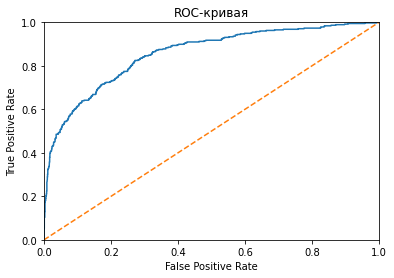

Глубина: 12,
Количество деревьев: 17,
F1-мера: 0.5957446808510638
AUC-ROC: 0.8557726821743669


In [23]:
best_depth_rfc = best_f1_rfc = 0 
for est in range (1,30):
    for depth in range(1,15):
        model_rfc = RandomForestClassifier(random_state=12345,
                                                               n_estimators=est, max_depth = depth ) 
        model_rfc.fit(features_train, target_train)
        predicted_valid_rfc = model_rfc.predict(features_valid)
        f1_rfc = f1_score(target_valid, predicted_valid_rfc)
        if f1_rfc > best_f1_rfc:
            best_model_rfc = model_rfc
            best_depth_rfc = depth
            best_f1_rfc = f1_rfc
            best_est = est

probabilities_valid = best_model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Глубина: {best_depth_rfc},")
print(f"Количество деревьев: {best_est},")
print(f"F1-мера: {best_f1_rfc}")
print(f"AUC-ROC: {auc_roc}")

predicted_valid_rfc = pd.Series(predicted_valid_rfc)

class_frequency_rfc = predicted_valid_rfc.value_counts(normalize=2/len(predicted_valid_rfc))


**Логическая регрессия**

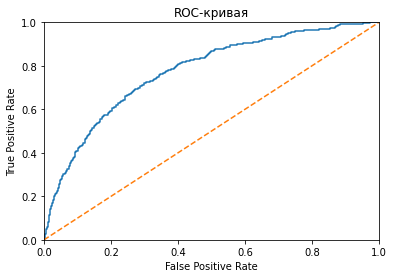

Solver:sag
F1-мера 0.30400000000000005
AUC-ROC: 0.7736577715519543


In [24]:
solvers = ['lbfgs', 'liblinear', 'newton-cg',  'sag'];
best_f1_lr = 0

for solver_lr in solvers:
    model_lr = LogisticRegression(solver=solver_lr, random_state=12345)
    model_lr.fit(features_train, target_train)
    predicted_valid_lr = model_lr.predict(features_valid)
    f1_lr = f1_score(target_valid, predicted_valid_lr)
    
    if f1_lr >= best_f1_lr:
        best_f1_lr = f1_lr
        best_model_lr = model_lr
        best_solver_lr = solver_lr

probabilities_valid = best_model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Solver:{best_solver_lr}")
print("F1-мера", best_f1_lr)
print(f"AUC-ROC: {auc_roc}")

predicted_valid_lr = pd.Series(predicted_valid_lr)

class_frequency_lr = predicted_valid_lr.value_counts(normalize=2/len(predicted_valid_lr))


Самое лучшее значение **F1** = 0.59574 и **AUC-ROC** = 0.8557 у случайного леса. На втором месте решающее дерево, на третьем линейная регрессия

**Проверка адекватности моделей до борьбы с дисбалансом**

0    0.790979
1    0.209021
dtype: float64


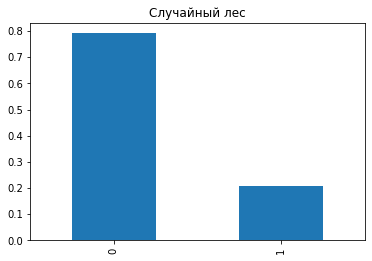

In [25]:
#дерево решений
print(class_frequency_dtc)
class_frequency_dtc.plot(kind='bar', title = 'Случайный лес');

0    0.877888
1    0.122112
dtype: float64


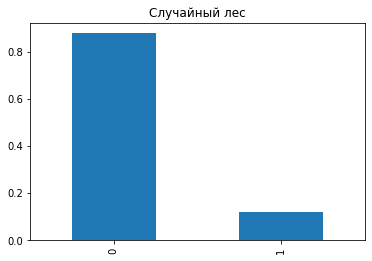

In [26]:
#случайный лес
print(class_frequency_rfc)
class_frequency_rfc.plot(kind='bar', title = 'Случайный лес');

0    0.932343
1    0.067657
dtype: float64


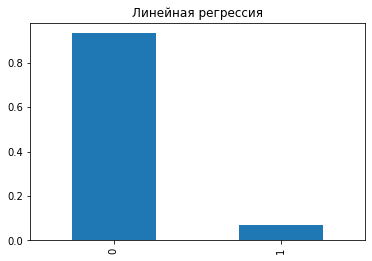

In [27]:
#линейная регрессия
print(class_frequency_lr)
class_frequency_lr.plot(kind='bar',title = 'Линейная регрессия');

Самая высокая точность у логической регресии, потом у случайного леса, далее у дерева решений.

## Борьба с дисбалансом

Рассмотрим три варивнта борьбы с дисбалансом:
 - взвешивание классов;
 - увеличение выборки;
 - уменьшение выборки.

**Взвешивание классов**

Более редкому классу присваивается вес.

**Решающее дерево**

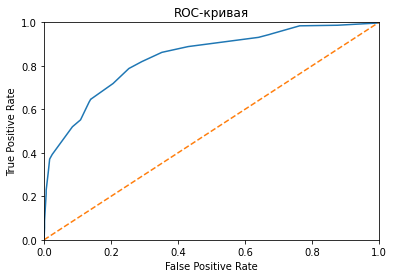

Глубина: 5
F1-мера, 0.5735449735449736
AUC-ROC: 0.8396523192522141


In [28]:
best_depth_dtc = best_f1_dtc = 0

for depth in range(1, 25):
    model_dtc = DecisionTreeClassifier(class_weight='balanced', max_depth = depth, random_state=12345)
    model_dtc.fit(features_train, target_train)
    predicted_valid_dtc = model_dtc.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_valid_dtc)
    if f1_dtc >= best_f1_dtc:
        best_f1_dtc = f1_dtc
        best_model_dtc = model_dtc
        best_depth_dtc = depth      

probabilities_valid = best_model_dtc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Глубина: {best_depth_dtc}")
print(f"F1-мера, {best_f1_dtc}")
print(f"AUC-ROC: {auc_roc}")


**Случайный лес**

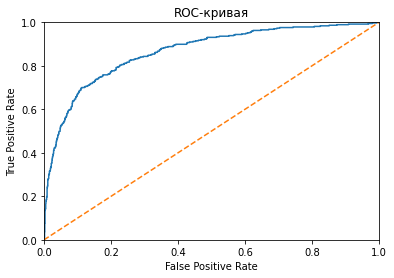

Глубина: 9,
Количество деревьев: 26,
F1-мера: 0.656641604010025
AUC-ROC: 0.8656667102310693


In [29]:
best_depth_rfc = best_f1_rfc = 0 
for est in range (1,30):
    for depth in range(1,15):
        model_rfc = RandomForestClassifier(class_weight='balanced', random_state=12345,
                                                               n_estimators=est, max_depth = depth ) 
        model_rfc.fit(features_train, target_train)
        predicted_valid_rfc = model_rfc.predict(features_valid)
        f1_rfc = f1_score(target_valid, predicted_valid_rfc)
        if f1_rfc > best_f1_rfc:
            best_model_rfc = model_rfc
            best_depth_rfc = depth
            best_f1_rfc = f1_rfc
            best_est = est

probabilities_valid = best_model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Глубина: {best_depth_rfc},")
print(f"Количество деревьев: {best_est},")
print(f"F1-мера: {best_f1_rfc}")
print(f"AUC-ROC: {auc_roc}")

**Логическая регрессия**

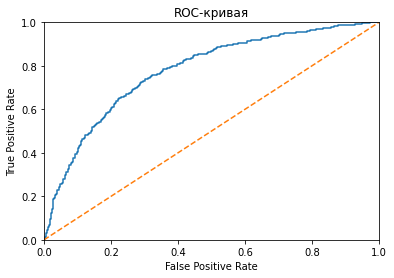

Solver:sag
F1-мера 0.509731232622799
AUC-ROC: 0.777782890970572


In [30]:
solvers = ['lbfgs', 'liblinear', 'newton-cg',  'sag'];
best_f1_lr = 0

for solver_lr in solvers:
    model_lr = LogisticRegression(class_weight='balanced', solver=solver_lr, random_state=12345)
    model_lr.fit(features_train, target_train)
    predicted_valid_lr = model_lr.predict(features_valid)
    f1_lr = f1_score(target_valid, predicted_valid_lr)
    
    if f1_lr >= best_f1_lr:
        best_f1_lr = f1_lr
        best_model_lr = model_lr
        best_solver_lr = solver_lr

probabilities_valid = best_model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Solver:{best_solver_lr}")
print("F1-мера", best_f1_lr)
print(f"AUC-ROC: {auc_roc}")

**Увеличинение выборки (upsampling)**

Преобразование проходит в несколько этапов:

- Разделить обучающую выборку на отрицательные и положительные объекты;
- Скопировать несколько раз положительные объекты;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.

In [31]:
positive/negative

0.25580811252040686

Это значит, что положительных объектов в 4 раз меньше отрицательных.

In [32]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

**Решающее дерево**

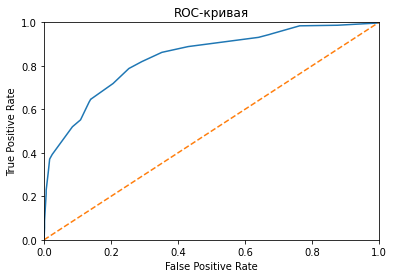

Глубина: 5
F1-мера, 0.5735449735449736
AUC-ROC: 0.8396523192522141


In [33]:
best_depth_dtc = best_f1_dtc = 0

for depth in range(1, 25):
    model_dtc = DecisionTreeClassifier( max_depth = depth, random_state=12345)
    model_dtc.fit(features_upsampled, target_upsampled)
    predicted_valid_dtc = model_dtc.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_valid_dtc)
    if f1_dtc >= best_f1_dtc:
        best_f1_dtc = f1_dtc
        best_model_dtc = model_dtc
        best_depth_dtc = depth      

probabilities_valid = best_model_dtc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Глубина: {best_depth_dtc}")
print(f"F1-мера, {best_f1_dtc}")
print(f"AUC-ROC: {auc_roc}")


**Случайный лес**

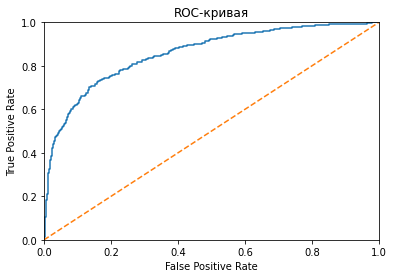

Глубина: 10,
Количество деревьев: 21,
F1-мера: 0.6332138590203106
AUC-ROC: 0.8576069889573443


In [34]:
best_depth_rfc = best_f1_rfc = 0 
for est in range (1,30):
    for depth in range(1,15):
        model_rfc = RandomForestClassifier( random_state=12345,
                                                               n_estimators=est, max_depth = depth ) 
        model_rfc.fit(features_upsampled, target_upsampled)
        predicted_valid_rfc = model_rfc.predict(features_valid)
        f1_rfc = f1_score(target_valid, predicted_valid_rfc)
        if f1_rfc > best_f1_rfc:
            best_model_rfc = model_rfc
            best_depth_rfc = depth
            best_f1_rfc = f1_rfc
            best_est = est

probabilities_valid = best_model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Глубина: {best_depth_rfc},")
print(f"Количество деревьев: {best_est},")
print(f"F1-мера: {best_f1_rfc}")
print(f"AUC-ROC: {auc_roc}")

**Логическая регрессия**

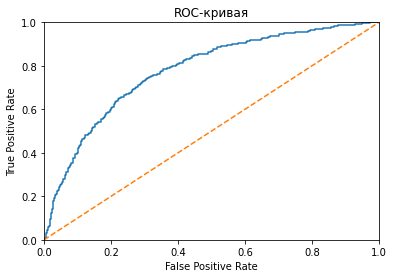

Solver:sag
F1-мера 0.5085972850678734
AUC-ROC: 0.7778657246938374


In [35]:
solvers = ['lbfgs', 'liblinear', 'newton-cg',  'sag'];
best_f1_lr = 0

for solver_lr in solvers:
    model_lr = LogisticRegression( solver=solver_lr, random_state=12345)
    model_lr.fit(features_upsampled, target_upsampled)
    predicted_valid_lr = model_lr.predict(features_valid)
    f1_lr = f1_score(target_valid, predicted_valid_lr)
    
    if f1_lr >= best_f1_lr:
        best_f1_lr = f1_lr
        best_model_lr = model_lr
        best_solver_lr = solver_lr

probabilities_valid = best_model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Solver:{best_solver_lr}")
print("F1-мера", best_f1_lr)
print(f"AUC-ROC: {auc_roc}")

**Уменьшение выборки (downsampling)**

Преобразование проходит в несколько этапов:
- Разделить обучающую выборку на отрицательные и положительные объекты;
- Случайным образом отбросить часть из отрицательных объектов;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные. Положительные не должны идти следом за отрицательными: алгоритмам будет сложнее обучаться.

In [36]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)


**Решающее дерево**

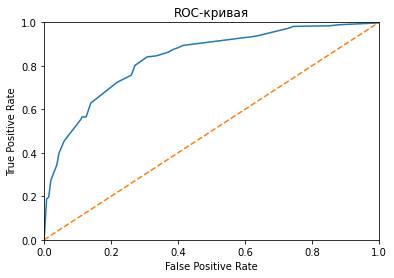

Глубина: 6
F1-мера, 0.5636704119850188
AUC-ROC: 0.8343500405885245


In [37]:
best_depth_dtc = best_f1_dtc = 0

for depth in range(1, 25):
    model_dtc = DecisionTreeClassifier( max_depth = depth, random_state=12345)
    model_dtc.fit(features_downsampled, target_downsampled)
    predicted_valid_dtc = model_dtc.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_valid_dtc)
    if f1_dtc >= best_f1_dtc:
        best_f1_dtc = f1_dtc
        best_model_dtc = model_dtc
        best_depth_dtc = depth      

probabilities_valid = best_model_dtc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Глубина: {best_depth_dtc}")
print(f"F1-мера, {best_f1_dtc}")
print(f"AUC-ROC: {auc_roc}")

**Случайный лес**

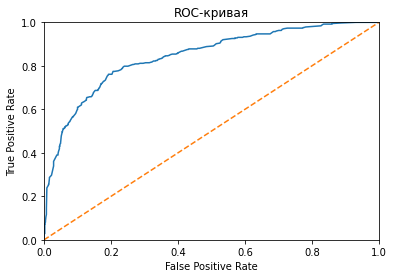

Глубина: 4,
Количество деревьев: 5,
F1-мера: 0.6035751840168244
AUC-ROC: 0.8441621552966644


In [38]:
best_depth_rfc = best_f1_rfc = 0 
for est in range (1,30):
    for depth in range(1,15):
        model_rfc = RandomForestClassifier( random_state=12345,
                                                               n_estimators=est, max_depth = depth ) 
        model_rfc.fit(features_downsampled, target_downsampled)
        predicted_valid_rfc = model_rfc.predict(features_valid)
        f1_rfc = f1_score(target_valid, predicted_valid_rfc)
        if f1_rfc > best_f1_rfc:
            best_model_rfc = model_rfc
            best_depth_rfc = depth
            best_f1_rfc = f1_rfc
            best_est = est

probabilities_valid = best_model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Глубина: {best_depth_rfc},")
print(f"Количество деревьев: {best_est},")
print(f"F1-мера: {best_f1_rfc}")
print(f"AUC-ROC: {auc_roc}")

**Логическая регрессия**

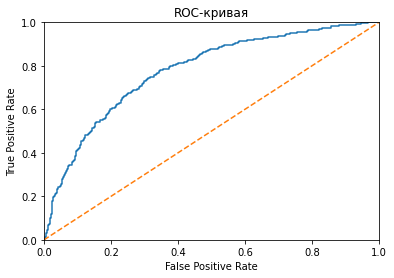

Solver:liblinear
F1-мера 0.5053763440860214
AUC-ROC: 0.7771662399195961


In [39]:
solvers = ['lbfgs', 'liblinear', 'newton-cg',  'sag'];
best_f1_lr = 0

for solver_lr in solvers:
    model_lr = LogisticRegression( solver=solver_lr, random_state=12345)
    model_lr.fit(features_downsampled, target_downsampled)
    predicted_valid_lr = model_lr.predict(features_valid)
    f1_lr = f1_score(target_valid, predicted_valid_lr)
    
    if f1_lr >= best_f1_lr:
        best_f1_lr = f1_lr
        best_model_lr = model_lr
        best_solver_lr = solver_lr

probabilities_valid = best_model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"Solver:{best_solver_lr}")
print("F1-мера", best_f1_lr)
print(f"AUC-ROC: {auc_roc}")

Самый хороший результат показал метод взвешивания классов на модели случайного леса: **F1-мера: 0.6566, AUC-ROC: 0.86566**

## Тестирование модели

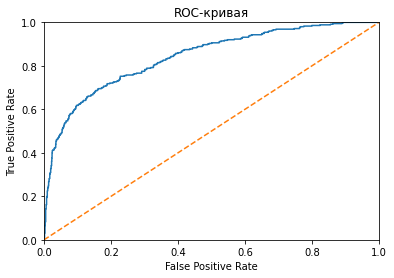

Глубина: 12,
Количество деревьев: 21,
F1-мера: 0.6077844311377246
AUC-ROC: 0.8409119138001973


In [40]:
#случайный лес
model_rfc = RandomForestClassifier(class_weight='balanced', random_state=12345,
                                                       n_estimators=26, max_depth = 9 ) 
model_rfc.fit(features_train, target_train)
predicted_test_rfc = model_rfc.predict(features_test)
f1_rfc = f1_score(target_test, predicted_test_rfc)

probabilities_test = model_rfc.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test,probabilities_one_test)
plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")
plt.show()

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(f"Глубина: {best_depth_rfc},")
print(f"Количество деревьев: {best_est},")
print(f"F1-мера: {best_f1_rfc}")
print(f"AUC-ROC: {auc_roc}")

В результате было получено, что лучшие показатели **F1 = 0.616666** имеет модель случайного леса с использованием метода взвешивания класса. Хуже всего себя показала модель линейной регрессии. **AUC-ROC = 0.756** модель достаточно адекватна.

## Итоговый вывод ##

В рамках работы были выполнены следующие действия:

- Была выполнена предобработка данных: удалены не нужные столбцы, сделано масштабирование количественных признаков, преобразованы категориальные данные;
- Датафрейм был разбит на обучающую, тестовую и валидационную выборки.
- Были исследованы три модели с изменением гиперпараметров: Дерево решений, Случайный лес, Логическая регрессия. Были получены значения меры F1, AUC_ROC и построена ROC-кривая для несбалансированной выборки. Лучший результат показала модель **Случайный лес, F1-мера: 0.5957, AUC-ROC: 0.85577** c гиперпараметрами: Глубина: 12, Количество деревьев: 17.
- Была проведена борьба с дисбалансом. Использовалось три метода: **взвешивание классов**, **увеличение классов**, **уменьшение классов**. Для каждого из методов были обучены три модели с различными гиперпарметрами: Дерево решений, Случайный лес, Логическая регрессия. Лучший результат показала модель  **Случайный лес, F1-мера: 0.6566, AUC-ROC: 0.86567** c гиперпараметрами: Глубина: 9, Количество деревьев: 26 с ипользованием метода **взвешивание классов**.
- Далее была проведена проверка на тестовой выборке и полученs значения **F1-мера: 0.608, AUC-ROC: 0.84**. Модель: случайный лес; гиперпараметры: Глубина: 12,Количество деревьев: 21; метод борьюы с дисбалансом взвешивание классов.
